# San Diego Burrito Analytics

Scott Cole

23 April 2016

This notebook contains analyses on the burrito ratings in San Diego, including:
* PCA

# Default imports

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

import seaborn as sns
sns.set_style("white")

C:\Users\Scott\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Load data

In [2]:
filename="burrito_current.csv"
df = pd.read_csv(filename)
N = df.shape[0]

In [8]:
import numpy as np
from sklearn.decomposition import PCA
pcaMet = ['Hunger','Cost','Tortilla','Temp','Meat','Fillings','Meat:filling',
               'Uniformity','Salsa','Synergy','Wrap','overall']
X = df[pcaMet].dropna().as_matrix()
pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_) 

[ 0.28178829  0.1440416   0.13474127  0.10920776  0.07671873  0.06267233
  0.05932323  0.04394394  0.03638671  0.02243811  0.02035166  0.00838637]


In [9]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.28178829,  0.42582989,  0.56057117,  0.66977892,  0.74649766,
        0.80916999,  0.86849321,  0.91243715,  0.94882386,  0.97126197,
        0.99161363,  1.        ])

In [22]:
# Convert burritos from 12D-space to 3D-space
Ndim = 3
Xpca = np.dot(pca.components_[:Ndim],X.T)

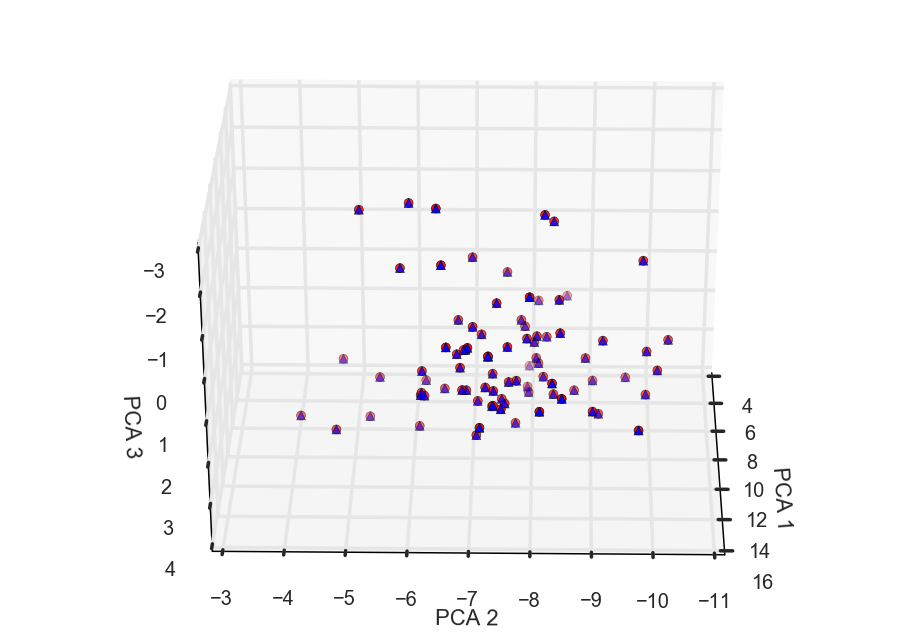

In [40]:
# PCA space doesn't look any different from each angle
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
for c, m, zl, zh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zl, zh)
    ax.scatter(Xpca[0], Xpca[1], Xpca[2], c=c, marker=m)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
#ax.view_init(330, angle)

(3L, 12L)

In [6]:
np.shape(df[pcaMet].dropna().as_matrix())

(85L, 9L)